In [1]:
# IMPORTING NECESSARY LIBRRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# FATCHING THE SURVEY RESPONSE DATA AND QUESTION SCHEMA
df = pd.read_csv('Data/Survey - Form responsess.csv')
schema_df = pd.read_csv('Data/Question_Schema.csv')

In [3]:
df.head(10)

,Age_Range,Gender,Educational_Level,Experienced_Health_Issues,Health_Issues_Type,Hangover_Experience,Mental_Sickness,Mental_Sickness_Level,Relationship_Impact,Relationship_Impact_Level,Negative_Influenced_Academic_Professional,Medical_Treatment,Control_CutDown,Physical _Health_Level,Mental_Health_Level,Participated_Alcohol_Rehabilitation,Potential_Risk_Factor,Achieve_Life_Goals,Friendship_Lost,Negative_Impact_of_Alcohol
0,20-30,Male,High School,No,NaN,5.0,No,NaN,No,NaN,No,No,No,8.0,8,No,No,No,No,Neutral
1,20-30,Male,College,No,NaN,2.0,No,NaN,No,NaN,No,No,Yes,5.0,5,No,Yes,Yes,No,Agree
2,20-30,Female,University,No,NaN,8.0,Yes,7.0,Yes,8.0,Yes,Yes,Yes,8.0,8,No,Yes,No,No,Neutral
3,20-30,Female,University,No,NaN,8.0,Yes,7.0,Yes,8.0,Yes,Yes,Yes,8.0,8,No,Yes,No,No,Neutral
4,20-30,Female,University,No,NaN,8.0,Yes,7.0,Yes,8.0,Yes,Yes,Yes,8.0,8,No,Yes,No,No,Neutral
5,20-30,Male,College,No,NaN,3.0,No,2.0,No,1.0,No,No,No,8.0,8,No,Yes,No,No,Disagree
6,20-30,Female,College,Yes,hangover,9.0,Yes,5.0,No,NaN,No,Yes,No,8.0,9,No,No,No,No,Neutral
7,20-30,Female,University,Yes,Hangover,7.0,No,NaN,No,NaN,No,No,No,8.0,9,No,No,No,No,Agree
8,20-30,Female,University,No,NaN,8.0,No,1.0,No,1.0,No,No,No,7.0,8,No,Yes,No,No,Agree
9,20-30,Female,College,No,NaN,1.0,No,1.0,No,1.0,No,No,No,9.0,8,No,Yes,No,No,Disagree


In [4]:
pd.set_option('display.max_colwidth', None)
schema_df.head(20)

,Question ID,Full_Question,Short_Form
0,1,Select the range of your age,Age_Range
1,2,Your gender,Gender
2,3,Select your educational level,Educational_Level
3,4,Have you experienced any health issues as a result of your excess drinking behavior?,Experienced_Health_Issues
4,5,"If yes, please specify the health issues you have encountered due to excess drinking.",Health_Issues_Type
5,6,How frequently do you experience hangovers after a night of excessive drinking?,Hangover_Experience
6,7,"Have you noticed any changes in your mental well-being, such as increased anxiety or depression, related to your excess drinking behavior?",Mental_Sickness
7,8,"If yes, please describe how much excess drinking has affected your mental well-being.",Mental_Sickness_Level
8,9,"Have your personal relationships, including friendships and romantic relationships, been impacted by your excess drinking behavior?",Relationship_Impact
9,10,"If yes, please indicate how much your social relationships have been affected.",Relationship_Impact_Level


# DATA PRE-PROCESSING

In [5]:
df.shape

(172, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age_Range                                  172 non-null    object 
 1   Gender                                     172 non-null    object 
 2   Educational_Level                          172 non-null    object 
 3   Experienced_Health_Issues                  170 non-null    object 
 4   Health_Issues_Type                         81 non-null     object 
 5   Hangover_Experience                        169 non-null    float64
 6   Mental_Sickness                            170 non-null    object 
 7   Mental_Sickness_Level                      84 non-null     float64
 8   Relationship_Impact                        170 non-null    object 
 9   Relationship_Impact_Level                  86 non-null     float64
 10  Negative_Influenced_Academ

In [7]:
df.describe()

,Hangover_Experience,Mental_Sickness_Level,Relationship_Impact_Level,Physical _Health_Level,Mental_Health_Level
count,169.000000,84.000000,86.000000,171.000000,172.000000
mean,5.366864,5.964286,6.244186,8.128655,7.976744
std,2.718165,2.590280,2.877646,1.348571,1.442681
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,8.000000,7.000000
50%,6.000000,7.000000,7.000000,8.000000,8.000000
75%,8.000000,8.000000,8.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# CHECKING MISSING VALUES
df.isna().sum()

Age_Range                                     0
Gender                                        0
Educational_Level                             0
Experienced_Health_Issues                     2
Health_Issues_Type                           91
Hangover_Experience                           3
Mental_Sickness                               2
Mental_Sickness_Level                        88
Relationship_Impact                           2
Relationship_Impact_Level                    86
Negative_Influenced_Academic_Professional     1
Medical_Treatment                             1
Control_CutDown                               3
Physical _Health_Level                        1
Mental_Health_Level                           0
Participated_Alcohol_Rehabilitation           1
Potential_Risk_Factor                         0
Achieve_Life_Goals                            2
Friendship_Lost                               3
Negative_Impact_of_Alcohol                    2
dtype: int64

In [9]:
# DROPPING COLUMNS WHICH HAS MORE THAN 80 MISSING VALUES
df.drop(columns = {'Health_Issues_Type','Mental_Sickness_Level','Relationship_Impact_Level'},inplace = True)

FILLING THE MISSING VALUES WITH MEAN VALUE/FREQUENCEY

In [10]:
df['Experienced_Health_Issues'].value_counts()

No     92
Yes    78
Name: Experienced_Health_Issues, dtype: int64

In [11]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Experienced_Health_Issues'].fillna('No',inplace = True)

In [12]:
df['Hangover_Experience'].value_counts()

8.0     25
7.0     21
2.0     20
6.0     19
5.0     18
1.0     17
9.0     15
3.0     14
4.0     13
10.0     7
Name: Hangover_Experience, dtype: int64

In [13]:
# FILLING THE MISSING VALUE WITH MEAN VALUE
df['Hangover_Experience'].fillna(int(df['Hangover_Experience'].mean()),inplace = True)

In [14]:
df['Mental_Sickness'].value_counts()

No     104
Yes     66
Name: Mental_Sickness, dtype: int64

In [15]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Mental_Sickness'].fillna('No',inplace = True)

In [16]:
df['Relationship_Impact'].value_counts()

No     108
Yes     62
Name: Relationship_Impact, dtype: int64

In [17]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Relationship_Impact'].fillna('No',inplace = True)

In [18]:
df['Negative_Influenced_Academic_Professional'].value_counts()

No     121
Yes     50
Name: Negative_Influenced_Academic_Professional, dtype: int64

In [19]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Negative_Influenced_Academic_Professional'].fillna('No',inplace = True)

In [20]:
df['Medical_Treatment'].value_counts()

No     150
Yes     21
Name: Medical_Treatment, dtype: int64

In [21]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Medical_Treatment'].fillna('No',inplace = True)

In [22]:
df['Control_CutDown'].value_counts()

No     123
Yes     46
Name: Control_CutDown, dtype: int64

In [23]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Control_CutDown'].fillna('No',inplace = True)

In [24]:
df['Physical _Health_Level']

0       8.0
1       5.0
2       8.0
3       8.0
4       8.0
       ... 
167    10.0
168     NaN
169     9.0
170     6.0
171     7.0
Name: Physical _Health_Level, Length: 172, dtype: float64

In [25]:
# FILLING THE MISSING VALUE WITH MEAN VALUE
df['Physical _Health_Level'].fillna(int(df['Physical _Health_Level'].mean()),inplace = True)

In [26]:
df['Participated_Alcohol_Rehabilitation'].value_counts()

No     166
Yes      5
Name: Participated_Alcohol_Rehabilitation, dtype: int64

In [27]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Participated_Alcohol_Rehabilitation'].fillna('No',inplace = True)

In [28]:
df['Achieve_Life_Goals'].value_counts()

No     128
Yes     42
Name: Achieve_Life_Goals, dtype: int64

In [29]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Achieve_Life_Goals'].fillna('No',inplace = True)

In [30]:
df['Friendship_Lost'].value_counts()

No     151
Yes     18
Name: Friendship_Lost, dtype: int64

In [31]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Friendship_Lost'].fillna('No',inplace = True)

In [32]:
df['Negative_Impact_of_Alcohol'].value_counts()

Agree                109
Somewhat Agree        25
Neutral               19
Somewhat Disagree      9
Disagree               8
Name: Negative_Impact_of_Alcohol, dtype: int64

In [33]:
# FILLING THE MISSING VALUE WITH MOST FREQUENT ANSWER
df['Negative_Impact_of_Alcohol'].fillna('Agree',inplace = True)

In [34]:
# CHECKING AGAIN IF ANY MISSING VALUES
df.isna().sum()

Age_Range                                    0
Gender                                       0
Educational_Level                            0
Experienced_Health_Issues                    0
Hangover_Experience                          0
Mental_Sickness                              0
Relationship_Impact                          0
Negative_Influenced_Academic_Professional    0
Medical_Treatment                            0
Control_CutDown                              0
Physical _Health_Level                       0
Mental_Health_Level                          0
Participated_Alcohol_Rehabilitation          0
Potential_Risk_Factor                        0
Achieve_Life_Goals                           0
Friendship_Lost                              0
Negative_Impact_of_Alcohol                   0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [35]:
# SETTING THE GRAPH STYLE
plt.style.use('fivethirtyeight')

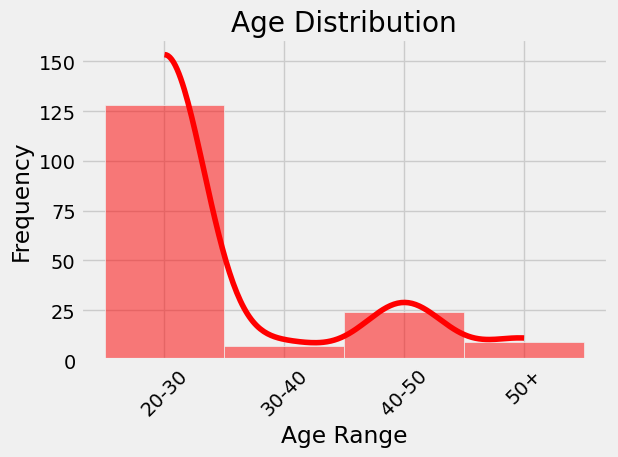

In [36]:
# CREATING a CATAGORICAL VARIABLE FOR BINS ORDER
bin_order = ['10-20', '20-30', '30-40', '40-50', '50+']
df['Age_Range'] = pd.Categorical(df['Age_Range'], categories=bin_order, ordered=True)

# SETTING THE WIDTH
bar_width = 0.2

# CREATING HISTOGRAM PLOT
sns.histplot(df['Age_Range'], bins=bin_order, kde=True, color='red', discrete=True)
plt.title("Age Distribution")
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

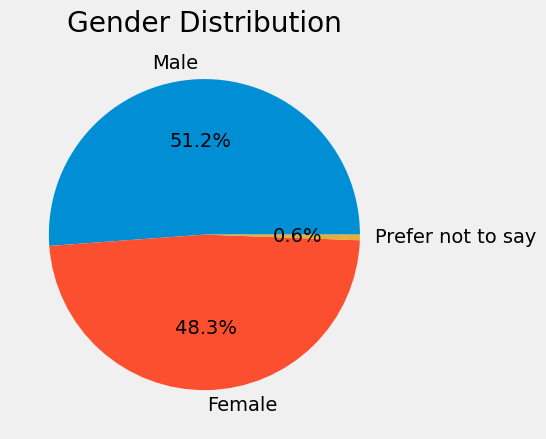

In [37]:
plt.title('Gender Distribution')
gender_count = df['Gender'].value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct = '%.1f%%')
plt.show()

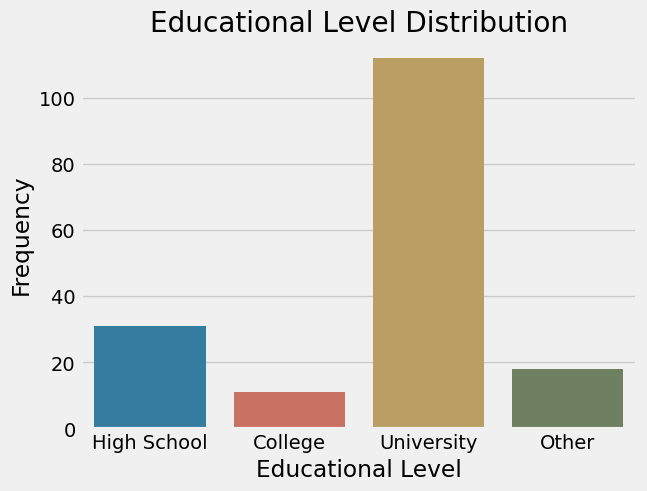

In [38]:
plt.title('Educational Level Distribution')
sns.countplot(x= 'Educational_Level', data= df,saturation = .5)
plt.xlabel("Educational Level")
plt.ylabel("Frequency")
plt.show()

In [39]:
# CREATING GROUP BASED ON AGE_RANGE
age_grp = df.groupby(['Age_Range'])

HOW DIFFERENT AGE RANGE PERSONS EXPERIENCED HEALTH ISSUES

In [40]:
# CALCULATING VALUE COUNTS FOR EACH AGE GROUP
count_20_30 = age_grp.get_group('20-30')['Experienced_Health_Issues'].value_counts()
count_30_40 = age_grp.get_group('30-40')['Experienced_Health_Issues'].value_counts()
count_40_50 = age_grp.get_group('40-50')['Experienced_Health_Issues'].value_counts()
count_50_plus = age_grp.get_group('50+')['Experienced_Health_Issues'].value_counts()

print(count_20_30)
print(count_30_40)
print(count_40_50)
print(count_50_plus)

No     78
Yes    50
Name: Experienced_Health_Issues, dtype: int64
No     6
Yes    1
Name: Experienced_Health_Issues, dtype: int64
Yes    19
No      5
Name: Experienced_Health_Issues, dtype: int64
Yes    7
No     2
Name: Experienced_Health_Issues, dtype: int64


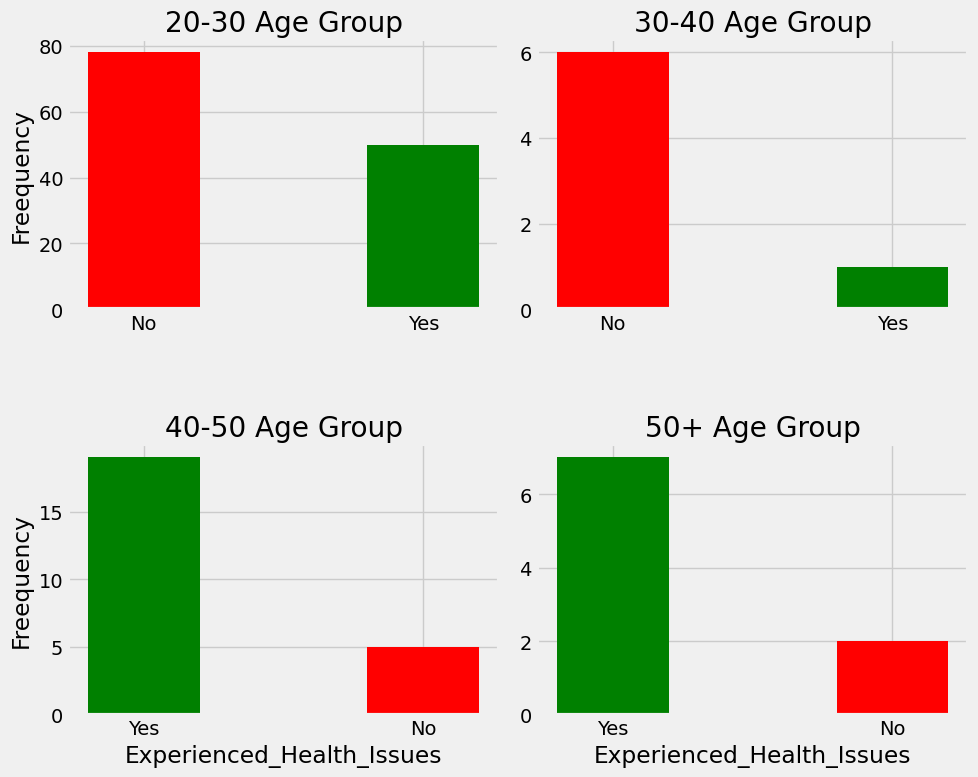

In [41]:
# ADJUSTING THE FIG SIZE AND BAR CHART WIDTH
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
bar_width = 0.4

# DEFINING COLOR FOR THE BAR
colors = ['red', 'green']
colors_rev = ['green', 'red'] 

# SUBPLOT-1
axes[0, 0].bar(['No', 'Yes'], count_20_30, width=bar_width, color = colors)
axes[0, 0].set_title('20-30 Age Group')
axes[0, 0].set_ylabel('Freequency')

# SUBPLOT 2
axes[0, 1].bar(['No', 'Yes'], count_30_40, width=bar_width, color = colors)
axes[0, 1].set_title('30-40 Age Group')

# SUBPLOT 3
axes[1, 0].bar(['Yes', 'No'], count_40_50, width=bar_width, color = colors_rev)
axes[1, 0].set_title('40-50 Age Group')
axes[1, 0].set_xlabel('Experienced_Health_Issues')
axes[1, 0].set_ylabel('Freequency')

# SUBPLOT 4
axes[1, 1].bar(['Yes', 'No'], count_50_plus, width=bar_width, color = colors_rev)
axes[1, 1].set_title('50+ Age Group')
axes[1, 1].set_xlabel('Experienced_Health_Issues')

# ADJUSTING SPACE
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

MENTAL SICKNESS OF DIFFERENT AGE RANGE PERSONS

In [42]:
# CALCULATING VALUE COUNTS FOR EACH AGE GROUP
count_20_30 = age_grp.get_group('20-30')['Mental_Sickness'].value_counts()
count_30_40 = age_grp.get_group('30-40')['Mental_Sickness'].value_counts()
count_40_50 = age_grp.get_group('40-50')['Mental_Sickness'].value_counts()
count_50_plus = age_grp.get_group('50+')['Mental_Sickness'].value_counts()

print(count_20_30)
print(count_30_40)
print(count_40_50)
print(count_50_plus)

No     81
Yes    47
Name: Mental_Sickness, dtype: int64
No     4
Yes    3
Name: Mental_Sickness, dtype: int64
No     14
Yes    10
Name: Mental_Sickness, dtype: int64
Yes    5
No     4
Name: Mental_Sickness, dtype: int64


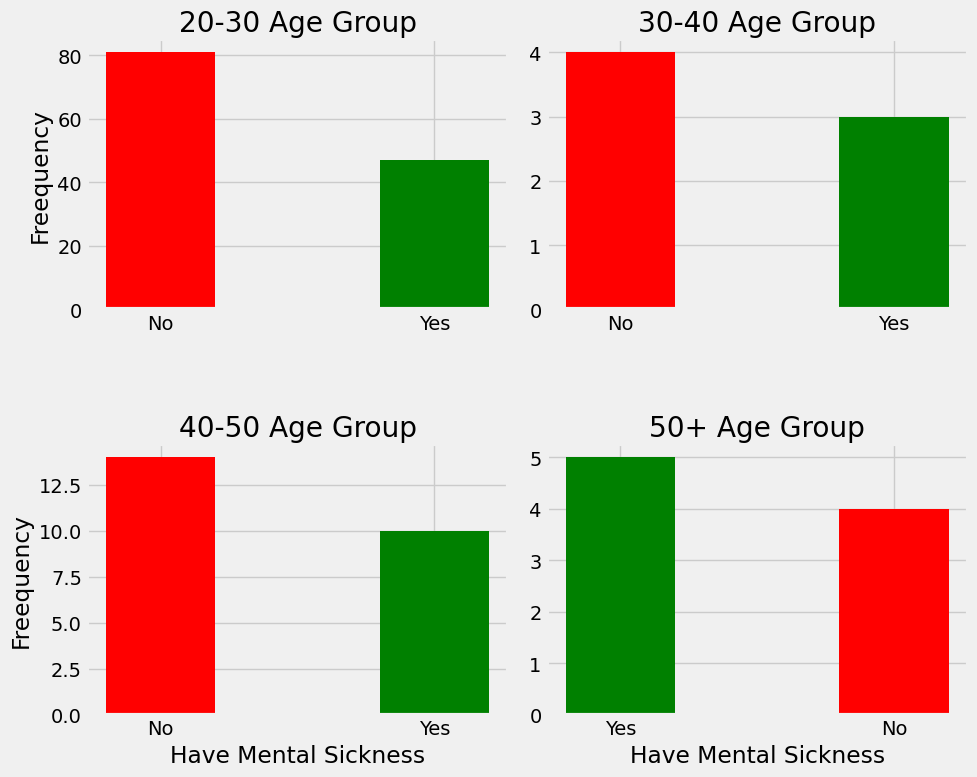

In [43]:
# ADJUSTING THE FIG SIZE AND BAR CHART WIDTH
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
bar_width = 0.4

# DEFINING COLOR FOR THE BAR
colors = ['red', 'green']
colors_rev = ['green', 'red'] 

# SUBPLOT-1
axes[0, 0].bar(['No', 'Yes'], count_20_30, width=bar_width, color = colors)
axes[0, 0].set_title('20-30 Age Group')
axes[0, 0].set_ylabel('Freequency')

# SUBPLOT 2
axes[0, 1].bar(['No', 'Yes'], count_30_40, width=bar_width, color = colors)
axes[0, 1].set_title('30-40 Age Group')

# SUBPLOT 3
axes[1, 0].bar(['No', 'Yes'], count_40_50, width=bar_width, color = colors)
axes[1, 0].set_title('40-50 Age Group')
axes[1, 0].set_xlabel('Have Mental Sickness')
axes[1, 0].set_ylabel('Freequency')

# SUBPLOT 4
axes[1, 1].bar(['Yes', 'No'], count_50_plus, width=bar_width, color = colors_rev)
axes[1, 1].set_title('50+ Age Group')
axes[1, 1].set_xlabel('Have Mental Sickness')

# ADJUSTING SPACE
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

HOW DIFFERENT AGE RANGE PERSONS EXPERIENCED NEGATIVE INFLUENCE OF THEIR ACADEMIC OR PROFESSIONAL LIFE

In [44]:
# CALCULATING VALUE COUNTS FOR EACH AGE GROUP
count_20_30 = age_grp.get_group('20-30')['Negative_Influenced_Academic_Professional'].value_counts()
count_30_40 = age_grp.get_group('30-40')['Negative_Influenced_Academic_Professional'].value_counts()
count_40_50 = age_grp.get_group('40-50')['Negative_Influenced_Academic_Professional'].value_counts()
count_50_plus = age_grp.get_group('50+')['Negative_Influenced_Academic_Professional'].value_counts()

print(count_20_30)
print(count_30_40)
print(count_40_50)
print(count_50_plus)

No     92
Yes    36
Name: Negative_Influenced_Academic_Professional, dtype: int64
No    7
Name: Negative_Influenced_Academic_Professional, dtype: int64
No     14
Yes    10
Name: Negative_Influenced_Academic_Professional, dtype: int64
No     5
Yes    4
Name: Negative_Influenced_Academic_Professional, dtype: int64


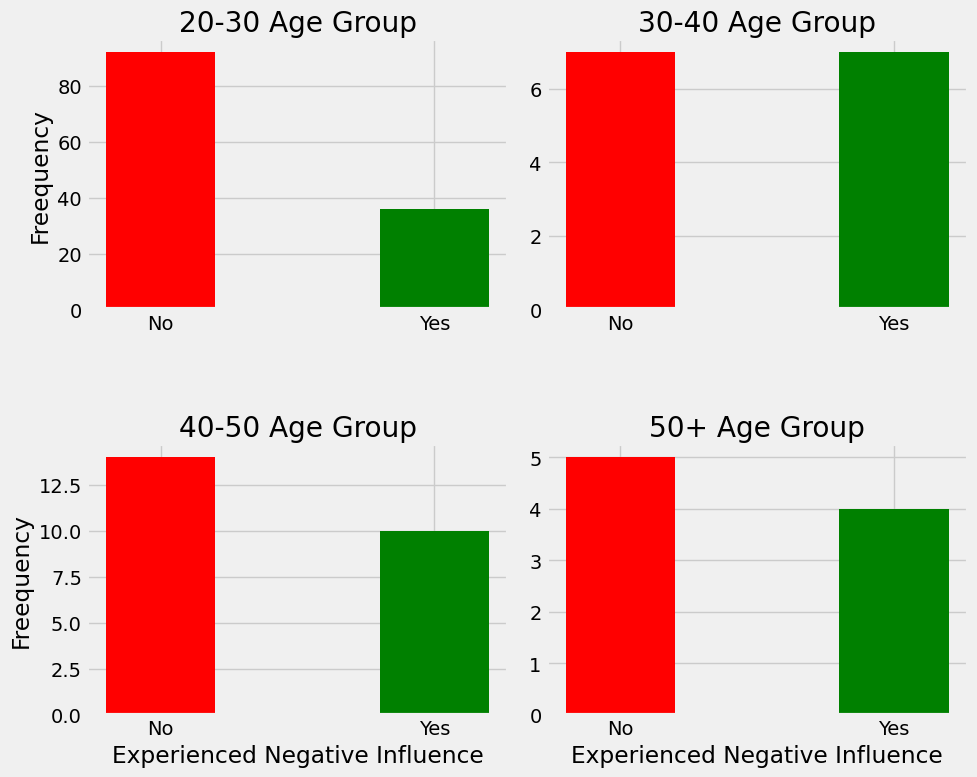

In [45]:
# ADJUSTING THE FIG SIZE AND BAR CHART WIDTH
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
bar_width = 0.4

# DEFINING COLOR FOR THE BAR
colors = ['red', 'green'] 

# SUBPLOT-1
axes[0, 0].bar(['No', 'Yes'], count_20_30, width=bar_width, color = colors)
axes[0, 0].set_title('20-30 Age Group')
axes[0, 0].set_ylabel('Freequency')

# SUBPLOT 2
axes[0, 1].bar(['No', 'Yes'], count_30_40, width=bar_width, color = colors)
axes[0, 1].set_title('30-40 Age Group')

# SUBPLOT 3
axes[1, 0].bar(['No', 'Yes'], count_40_50, width=bar_width, color = colors)
axes[1, 0].set_title('40-50 Age Group')
axes[1, 0].set_xlabel('Experienced Negative Influence')
axes[1, 0].set_ylabel('Freequency')

# SUBPLOT 4
axes[1, 1].bar(['No', 'Yes'], count_50_plus, width=bar_width, color = colors)
axes[1, 1].set_title('50+ Age Group')
axes[1, 1].set_xlabel('Experienced Negative Influence')

# ADJUSTING SPACE
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

In [46]:
# CREATING GROUP BASED ON GENDER & EDUCATIONAL_LEVEL
gender_grp = df.groupby(['Gender'])

GENDER BASED PERSONS MENTAL HEALTH PROBELEM

In [47]:
# CALCULATING VALUE COUNTS FOR EACH GENDER GROUP
count_male = gender_grp.get_group('Male')['Mental_Sickness'].value_counts()
count_female = gender_grp.get_group('Female')['Mental_Sickness'].value_counts()

print(count_male)
print(count_female)

No     56
Yes    32
Name: Mental_Sickness, dtype: int64
No     49
Yes    34
Name: Mental_Sickness, dtype: int64


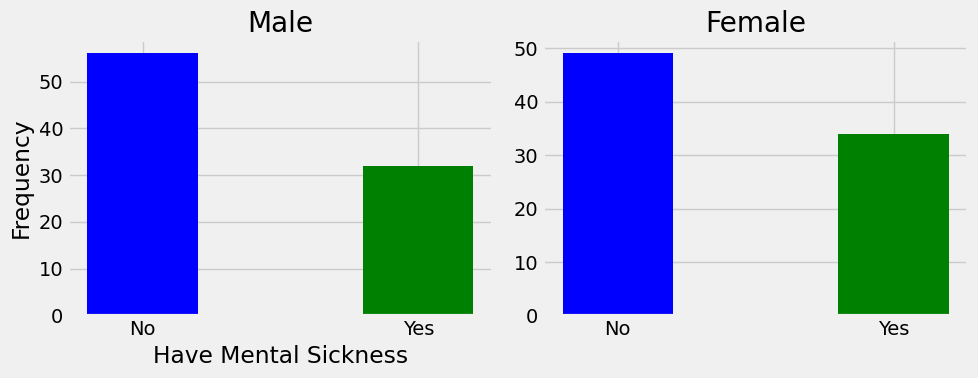

In [48]:
# ADJUSTING THE FIGURE SIZE AND BAR CHART WIDTH
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1-row, 2-column layout
bar_width = 0.4

# DEFINING COLOR FOR THE BAR
colors = ['blue', 'green'] 

# SUBPLOT-1
axes[0].bar(['No', 'Yes'], count_male, width=bar_width, color=colors)
axes[0].set_title('Male')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Have Mental Sickness')

# SUBPLOT 2
axes[1].bar(['No', 'Yes'], count_female, width=bar_width,color=colors)
axes[1].set_title('Female')

# ADJUSTING SPACE
plt.tight_layout()

plt.show()

GENDER BASED PERSONS MENTAL RELATIONSHIP IMPACT

In [49]:
# CALCULATING VALUE COUNTS FOR EACH GENDER GROUP
count_male = gender_grp.get_group('Male')['Relationship_Impact'].value_counts()
count_female = gender_grp.get_group('Female')['Relationship_Impact'].value_counts()

print(count_male)
print(count_female)

No     56
Yes    32
Name: Relationship_Impact, dtype: int64
No     53
Yes    30
Name: Relationship_Impact, dtype: int64


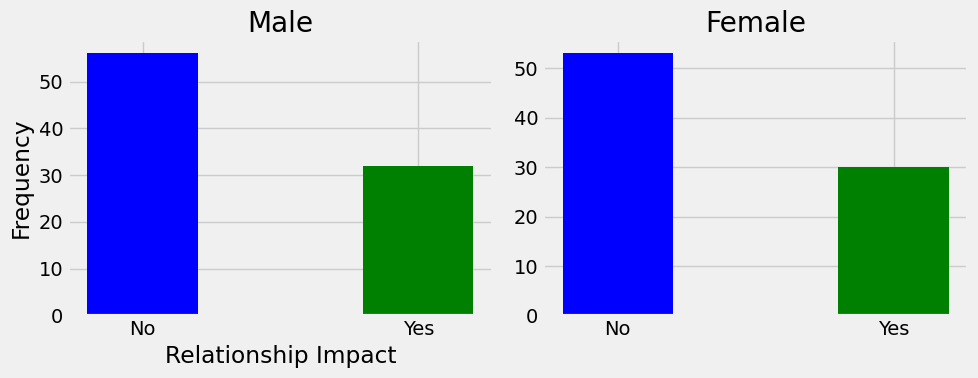

In [50]:
# ADJUSTING THE FIGURE SIZE AND BAR CHART WIDTH
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1-row, 2-column layout
bar_width = 0.4

# DEFINING COLOR FOR THE BAR
colors = ['blue', 'green'] 

# SUBPLOT-1
axes[0].bar(['No', 'Yes'], count_male, width=bar_width, color=colors)
axes[0].set_title('Male')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Relationship Impact')

# SUBPLOT 2
axes[1].bar(['No', 'Yes'], count_female, width=bar_width,color=colors)
axes[1].set_title('Female')

# ADJUSTING SPACE
plt.tight_layout()

plt.show()

GENDER BASED THOUGHTS ABOUT NEGATIVE IMPACT OF DRINKING ALCOHOL

In [51]:
# CALCULATING VALUE COUNTS FOR EACH GENDER GROUP
count_male = gender_grp.get_group('Male')['Negative_Impact_of_Alcohol'].value_counts()
count_female = gender_grp.get_group('Female')['Negative_Impact_of_Alcohol'].value_counts()

print(count_male)
print(count_female)

Agree                54
Neutral              15
Somewhat Agree       11
Disagree              4
Somewhat Disagree     4
Name: Negative_Impact_of_Alcohol, dtype: int64
Agree                56
Somewhat Agree       14
Somewhat Disagree     5
Neutral               4
Disagree              4
Name: Negative_Impact_of_Alcohol, dtype: int64


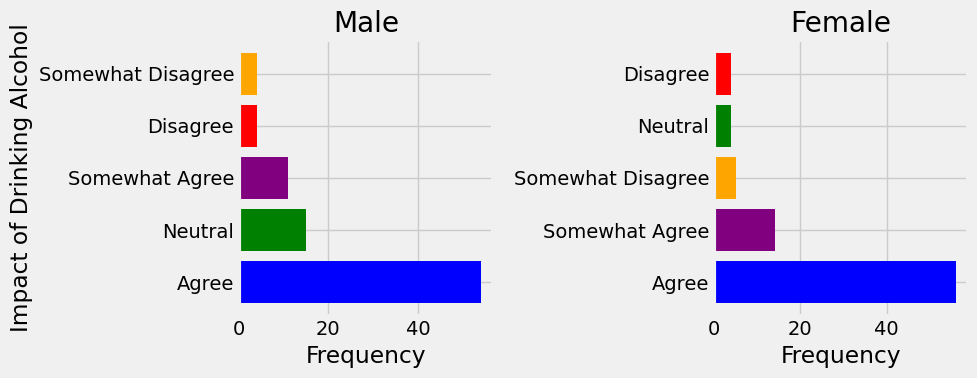

In [52]:
# ADJUSTING THE FIGURE SIZE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# DEFINING COLOR FOR THE BAR
colors = ['blue', 'green', 'purple', 'red', 'orange']
colors_rev = ['blue', 'purple','orange', 'green', 'red']

# SUBPLOT-1
axes[0].barh(['Agree', 'Neutral', 'Somewhat Agree', 'Disagree', 'Somewhat Disagree'], count_male, color=colors)
axes[0].set_title('Male')
axes[0].set_ylabel('Impact of Drinking Alcohol')
axes[0].set_xlabel('Frequency')

# SUBPLOT 2
axes[1].barh(['Agree', 'Somewhat Agree', 'Somewhat Disagree', 'Neutral', 'Disagree'], count_female, color=colors_rev)
axes[1].set_title('Female')
axes[1].set_xlabel('Frequency')

# ADJUSTING SPACE
plt.tight_layout()

plt.show()

In [53]:
# CREATING GROUP BASED ON EDUCATIONAL_LEVEL
education_grp = df.groupby(['Educational_Level'])

In [61]:
df['Educational_Level']

0      High School
1          College
2       University
3       University
4       University
          ...     
167     University
168    High School
169        College
170     University
171    High School
Name: Educational_Level, Length: 172, dtype: object

MENTAL PRESSURE LEVEL OF DIFFERENT LEVEL OF STUDENT

In [67]:
# CALCULATING VALUE COUNTS FOR EACH GENDER GROUP
count_school = education_grp.get_group('High School')['Mental_Health_Level'].value_counts()
count_clg = education_grp.get_group('College')['Mental_Health_Level'].value_counts()
count_uni = education_grp.get_group('University')['Mental_Health_Level'].value_counts()

print(count_school)
print(count_clg)
print(count_uni)

9     11
8      8
7      5
10     4
6      3
Name: Mental_Health_Level, dtype: int64
9     4
10    3
8     2
5     1
7     1
Name: Mental_Health_Level, dtype: int64
8     31
9     31
7     17
10    13
6     13
5      5
1      1
4      1
Name: Mental_Health_Level, dtype: int64


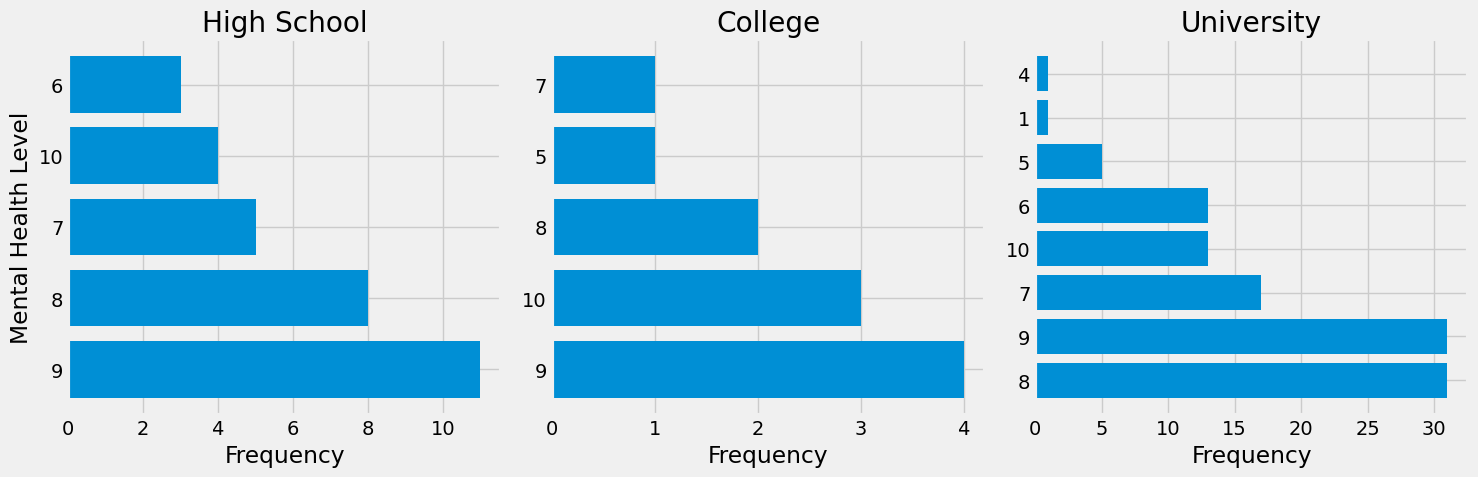

In [69]:
# Creating horizontal bar subplots for each educational level
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Horizontal bar for 'High School'
axes[0].barh(count_school.index.astype(str), count_school.values)
axes[0].set_title('High School')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Mental Health Level')

# Horizontal bar for 'College'
axes[1].barh(count_clg.index.astype(str), count_clg.values)
axes[1].set_title('College')
axes[1].set_xlabel('Frequency')


# Horizontal bar for 'University'
axes[2].barh(count_uni.index.astype(str), count_uni.values)
axes[2].set_title('University')
axes[2].set_xlabel('Frequency')


plt.tight_layout()
plt.show()